In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import LogNorm
%matplotlib inline

## 2d plots

In [2]:
# load saved data (mtt, m1, WC) values from files

cG = np.loadtxt("cG.txt", dtype=float)
cuG_33 = np.loadtxt("cuG_33.txt", dtype=float)
cqd1_3311 = np.loadtxt("cqd1_3311.txt", dtype=float)
cqq1_3333 = np.loadtxt("cqq1_3333.txt", dtype=float)
cqu1_1133 = np.loadtxt("cqu1_1133.txt", dtype=float)
cqu8_1133 = np.loadtxt("cqu8_1133.txt", dtype=float)
cqu8_3311 = np.loadtxt("cqu8_3311.txt", dtype=float)
cuu_3333 = np.loadtxt("cuu_3333.txt", dtype=float)

In [3]:
# x and y axes (common to all)

mtt = np.unique(cG[:,0])
m1 = np.unique(cG[:,1])

In [4]:
# General plot attributes

plt.rcParams['axes.labelpad'] = 16
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300})

In [5]:
# function for making 2d plots

def plot_fn_2d(wc_arr, wc_name, filename):
    vals = wc_arr.reshape(len(mtt),len(m1))
    fig, ax = plt.subplots(figsize=(8, 6))
    img = ax.imshow(vals.T, cmap='afmhot', norm=LogNorm(),
                    origin='lower', extent=[mtt.min(), mtt.max(), m1.min(), m1.max()])

    ax.plot([mtt.min(), mtt.max()], [m1.min(), m1.max()], color='gray', linestyle='--', linewidth=1.1)
    x_fill = np.linspace(mtt.min(), mtt.max(), 100)
    ax.fill_between(x_fill, x_fill, m1.max(), color='#AAAAAA', alpha=0.4)

    # Colorbar and labels
    cbar = fig.colorbar(img, ax=ax)
    cbar.set_label(wc_name, fontsize=27)
    ax.set_xlabel(r'$m_{\tilde{t}_R}\,\, {\rm (TeV)}$', fontsize=27)
    ax.set_ylabel(r'$m_1\,\, {\rm (TeV)}$', fontsize=27)
    ax.set_title(r'$g_{1} = 0.37, \quad g_{3} = 1.1$', fontsize=27, pad=16)
    ax.set_xticks([0.5,1.0,1.5,2.0,2.5])
    ax.set_yticks([0.5,1.0,1.5,2.0,2.5])
    plt.tight_layout()
    #plt.show()
    plt.savefig(filename)

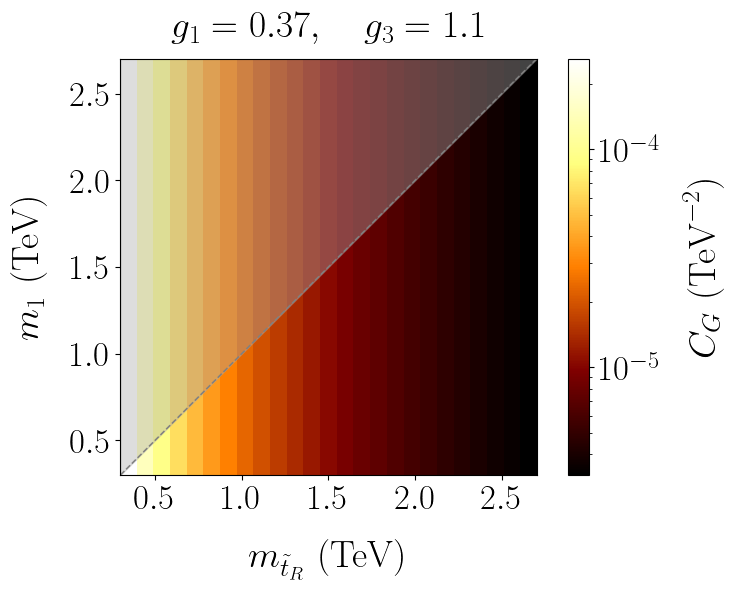

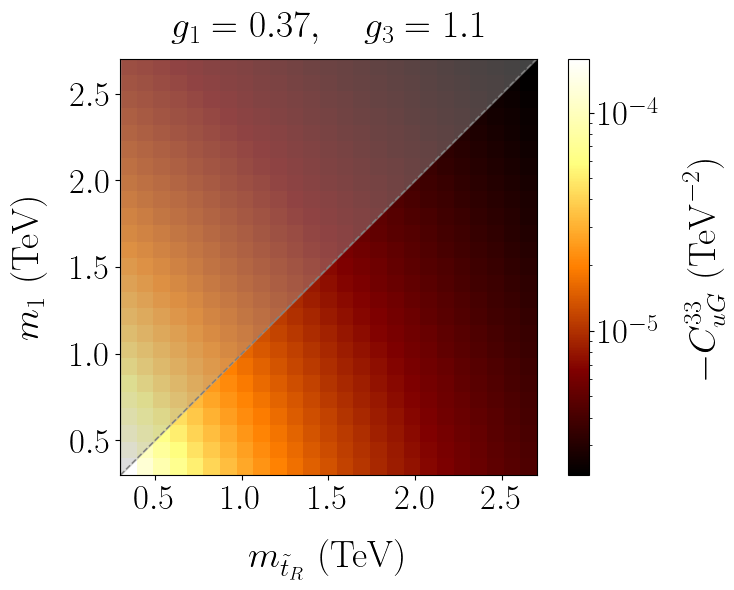

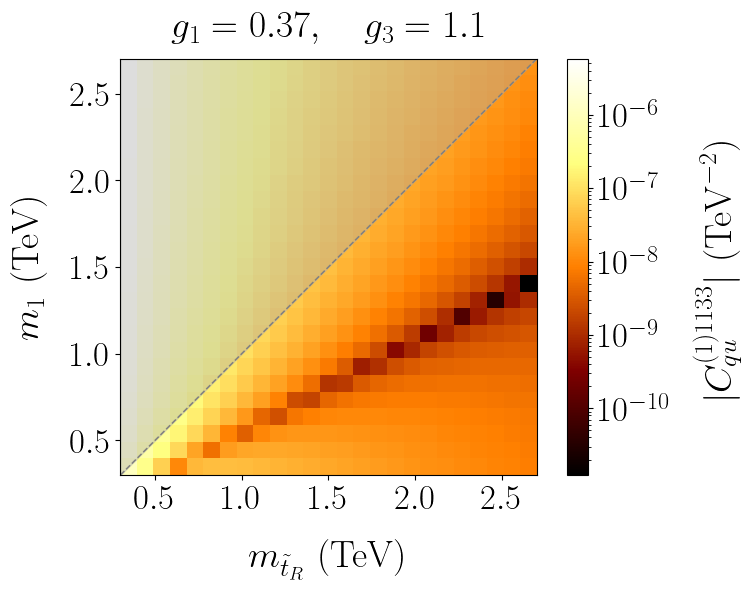

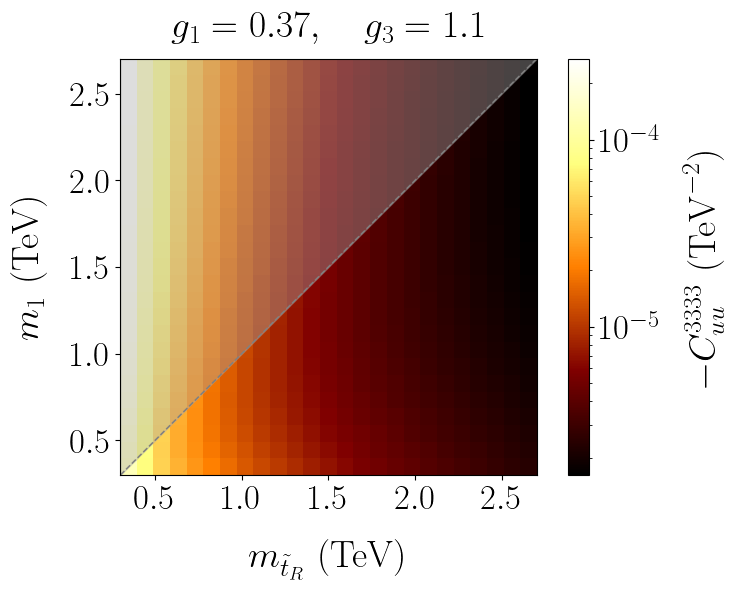

In [6]:
plot_fn_2d(cG[:,2], r'$C_{G}\,\, ({\rm TeV}^{-2})$', "cG.pdf")
plot_fn_2d(abs(cuG_33[:,2]), r'$-C_{uG}^{33}\,\, ({\rm TeV}^{-2})$', "cuG_33.pdf")
plot_fn_2d(abs(cqu1_1133[:,2]), r'$|C_{qu}^{(1)1133}|\,\, ({\rm TeV}^{-2})$', "cqu1_1133.pdf")
plot_fn_2d(abs(cuu_3333[:,2]), r'$-C_{uu}^{3333}\,\, ({\rm TeV}^{-2})$', "cuu_3333.pdf")

## Bar Plot

### Stop-Bino operators

In [7]:
data_sb = pd.read_csv("barplot-sb.csv")
data_sb

,mut3,m1,cG,cuG_33,cqu1_1133,cuu_3333,cqq1_3333,cqd1_3311,cqu8_3311,cqu8_1133
0,2.0,1.5,0.000006,-0.000005,-1.180110e-08,-0.000003,-0.000002,7.326090e-08,-0.000039,-0.000028
1,1.6,1.5,0.000009,-0.000007,-3.333940e-08,-0.000005,-0.000003,1.144700e-07,-0.000060,-0.000045
2,1.6,0.5,0.000009,-0.000011,1.461540e-08,-0.000006,-0.000003,1.144700e-07,-0.000060,-0.000041


In [8]:
cols_sb = ['cG', 'cuG_33', 'cqu1_1133', 'cuu_3333', 'cqq1_3333', 'cqd1_3311', 'cqu8_3311', 'cqu8_1133']

masses = []
vals_sb = []

for i, row in data_sb.iterrows():
    masses.append(row[['mut3', 'm1']].values)
    vals_sb.append(abs(row[cols_sb].values))

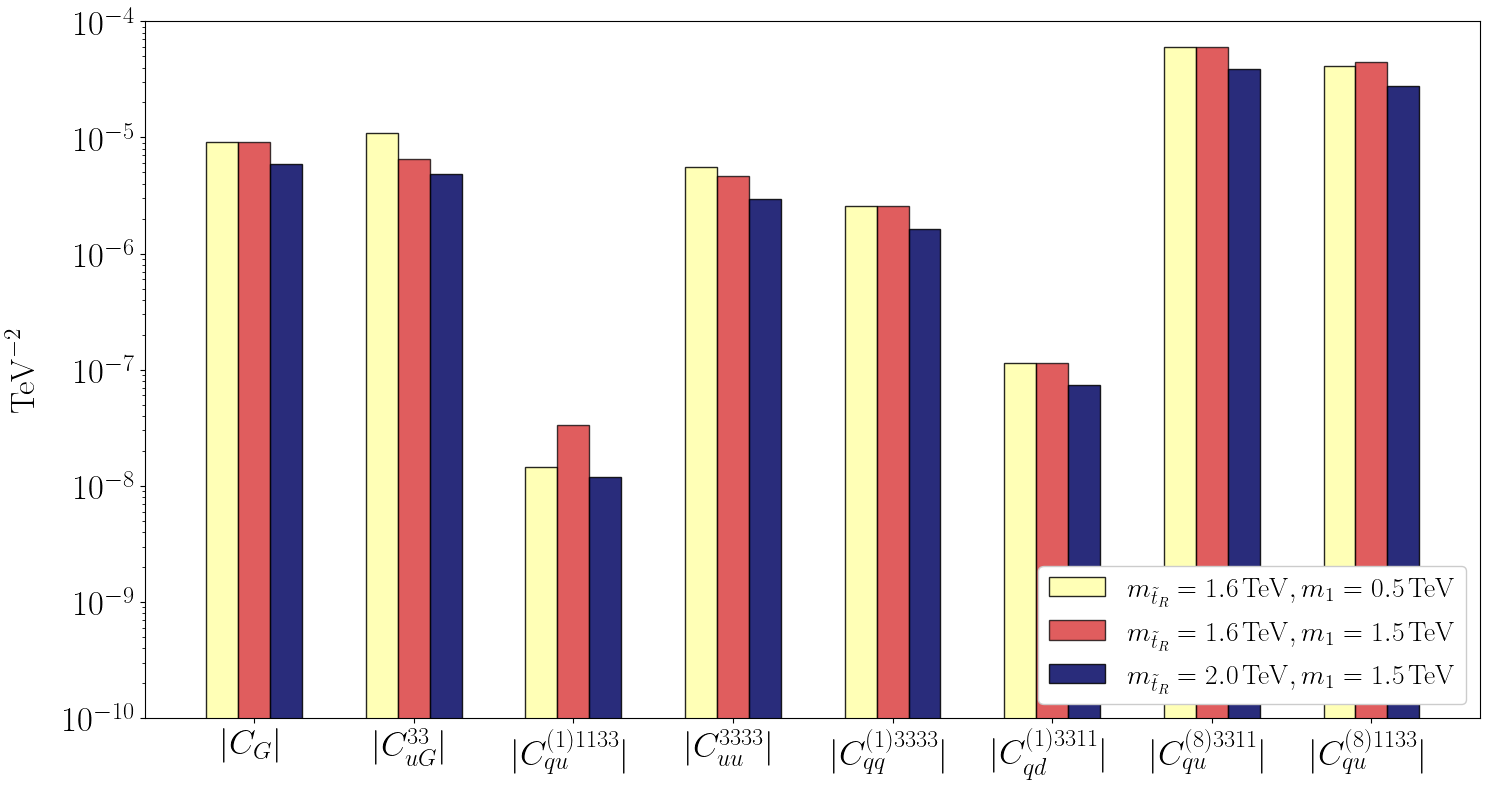

In [9]:
# Create a barplot for order of magnitude comparisons

plt.rcParams['axes.labelpad'] = 16
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300})

x_pos = np.arange(len(cols_sb))  # x positions for each b-column
bar_width = 0.2

fig, ax = plt.subplots(figsize=(15, 8))

ax.bar(x_pos - 0.2, vals_sb[2], width=bar_width, label=r"$m_{\tilde{t}_R} = {\rm 1.6\, TeV}, m_{1} = {\rm 0.5\, TeV}$", color='#FFFFAA', edgecolor='black', alpha=0.85)
ax.bar(x_pos, vals_sb[1], width=bar_width, label=r"$m_{\tilde{t}_R} = {\rm 1.6\, TeV}, m_{1} = {\rm 1.5\, TeV}$", color='tab:red', edgecolor='black', alpha=0.75)
ax.bar(x_pos + 0.2, vals_sb[0], width=bar_width, label=r"$m_{\tilde{t}_R} = {\rm 2.0\, TeV}, m_{1} = {\rm 1.5\, TeV}$", color='#030764', edgecolor='black', alpha=0.85)

ax.set_yscale('log')
ax.set_ylim(1e-10,1e-4)
ax.set_xticks(x_pos)
ax.set_xticklabels([r'$|C_{G}|$', 
                    r'$|C_{uG}^{33}|$', 
                    r'$|C_{qu}^{(1)1133}|$', 
                    r'$|C_{uu}^{3333}|$', 
                    r'$|C_{qq}^{(1)3333}|$', 
                    r'$|C_{qd}^{(1)3311}|$', 
                    r'$|C_{qu}^{(8)3311}|$', 
                    r'$|C_{qu}^{(8)1133}|$' ])  
ax.set_ylabel(r'${\rm TeV}^{-2}$', fontsize=24)
#ax.set_title(r'$g_{1} = 0.37, \quad\quad g_{s} = 1.1$', fontsize=22, pad=16)
ax.legend(fontsize=20,ncol=1,framealpha=1.0,loc=4)

plt.tight_layout()
plt.savefig("barplot_sb.pdf")

### Higgs-rich operators

In [2]:
data_h = pd.read_csv("barplot-h.csv")
data_h

,mut3,m1,cHBox,cHB,cHG,cuH_33,cHq1_33
0,2.0,1.5,-0.000231,0.000018,0.000061,-0.000018,0.000004
1,1.6,1.5,-0.000362,0.000029,0.000095,-0.000026,0.000005
2,1.6,0.5,-0.000362,0.000029,0.000095,-0.000032,0.000009


In [3]:
cols_h = ['cHBox', 'cHB', 'cHG', 'cuH_33', 'cHq1_33']

masses = []
vals_h = []

for i, row in data_h.iterrows():
    masses.append(row[['mut3', 'm1']].values)
    vals_h.append(abs(row[cols_h].values))

In [8]:
plt.rcParams['axes.labelpad'] = 16
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = r'\usepackage{amssymb}'

plt.rcParams.update({
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

#plt.rcParams.update({"savefig.dpi" : 300})

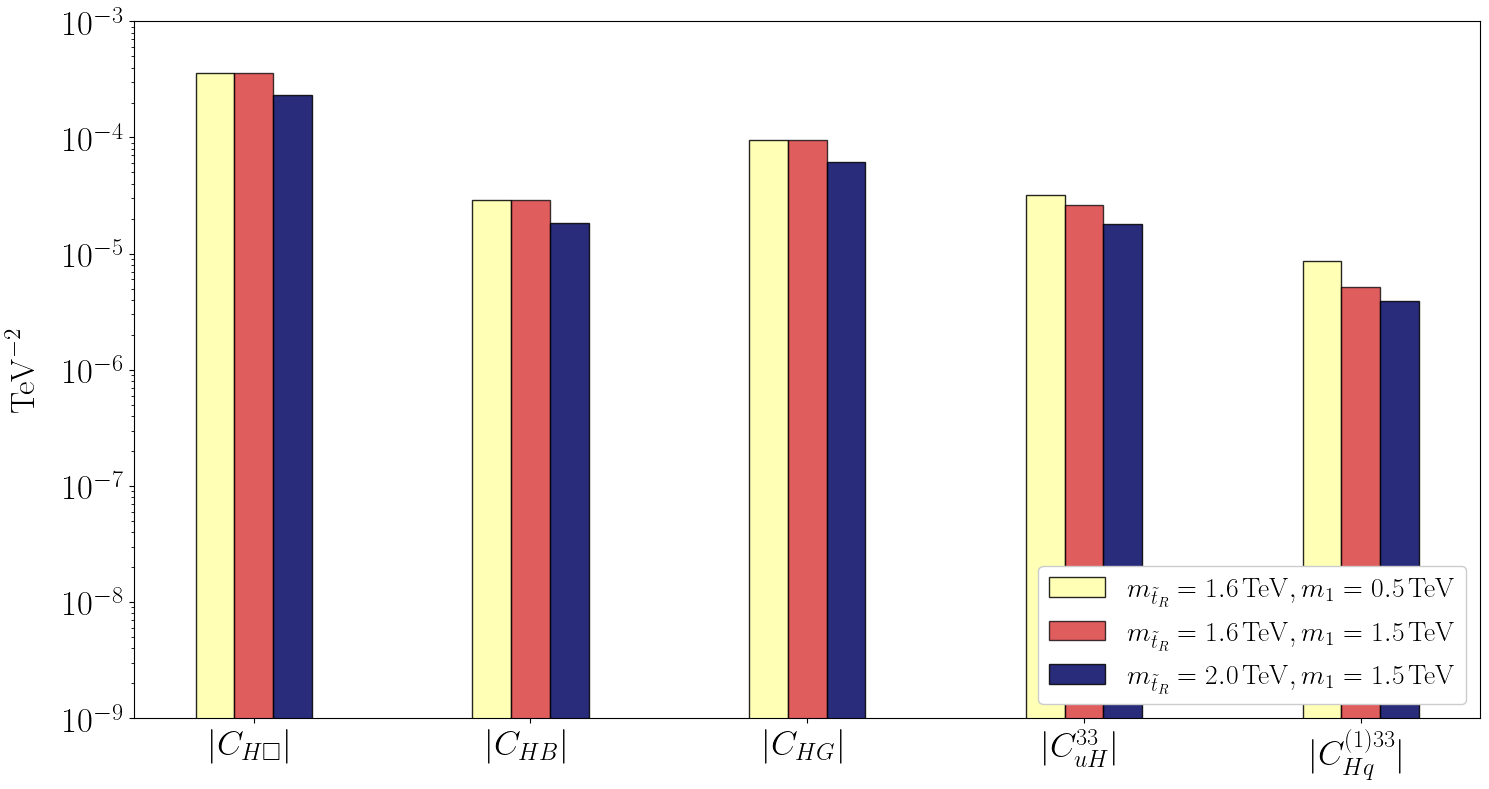

In [9]:
# Create a barplot for order of magnitude comparisons
x_pos = np.arange(len(cols_h))  # x positions for each b-column
bar_width = 0.14

fig, ax = plt.subplots(figsize=(15, 8))

ax.bar(x_pos - 0.14, vals_h[2], width=bar_width, label=r"$m_{\tilde{t}_R} = {\rm 1.6\, TeV}, m_{1} = {\rm 0.5\, TeV}$", color='#FFFFAA', edgecolor='black', alpha=0.85)
ax.bar(x_pos, vals_h[1], width=bar_width, label=r"$m_{\tilde{t}_R} = {\rm 1.6\, TeV}, m_{1} = {\rm 1.5\, TeV}$", color='tab:red', edgecolor='black', alpha=0.75)
ax.bar(x_pos + 0.14, vals_h[0], width=bar_width, label=r"$m_{\tilde{t}_R} = {\rm 2.0\, TeV}, m_{1} = {\rm 1.5\, TeV}$", color='#030764', edgecolor='black', alpha=0.85)

ax.set_yscale('log')
ax.set_ylim(1e-9,1e-3)
ax.set_xticks(x_pos)
ax.set_xticklabels([r'$|C_{H\square}|$', 
                    r'$|C_{HB}|$', 
                    r'$|C_{HG}|$', 
                    r'$|C_{uH}^{33}|$', 
                    r'$|C_{Hq}^{(1)33}|$' ])  
ax.set_ylabel(r'${\rm TeV}^{-2}$', fontsize=24)
#ax.set_title(r'$g_{1} = 0.37, \quad\quad g_{s} = 1.1$', fontsize=22, pad=16)
ax.legend(fontsize=20,ncol=1,framealpha=1.0,loc=4)

plt.tight_layout()
plt.savefig("barplot_h.pdf")